<a href="https://colab.research.google.com/github/vn322/Cod_future/blob/main/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Пример

In [2]:
data = {
    'Защита': [8, 9, 16, 15, 15, 17, 16, 18],
    'Атака': [20, 20, 25, 40, 35, 30, 29, 27],
    'Побед': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

,Защита,Атака,Побед
0,8,20,250
1,9,20,300
2,16,25,500
3,15,40,600
4,15,35,630
5,17,30,620
6,16,29,480
7,18,27,550


In [3]:
df['Результат'] = "мало"
df.head()

,Защита,Атака,Побед,Результат
0,8,20,250,мало
1,9,20,300,мало
2,16,25,500,мало
3,15,40,600,мало
4,15,35,630,мало


In [4]:
condition = (df['Побед'] > 500)
df.loc[condition, 'Результат'] = "много"
df.head()

,Защита,Атака,Побед,Результат
0,8,20,250,мало
1,9,20,300,мало
2,16,25,500,мало
3,15,40,600,много
4,15,35,630,много


Пример построения модели логистической регрессии. Несмотря на свое название, это линейная модель для классификации. Логистическая регрессия также известна как классификация с максимальной энтропией (MaxEnt) или логарифмический линейный классификатор. В этой модели вероятности, описывающие возможные результаты испытания, моделируются с использованием логистической функции. Эта реализация может соответствовать бинарной, или полиномиальной регрессии с дополнительной регуляризацией. Регуляризация применяется по умолчанию, что характерно для машинного обучения. Еще одним преимуществом регуляризации является то, что она улучшает стабильность модели. 

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
# целевая переменная  является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
le.fit( df['Результат'] )

LabelEncoder()

In [8]:
le.classes_

array(['мало', 'много'], dtype=object)

In [9]:
# пример "расшировки" столбца 

le.transform( [ 'много', 'мало', 'много' ] )

array([1, 0, 1])

Обучим модель на имеющихся данных и убедимся, что она точно предсказала имеющиеся данные на примере первых трёх измерений. Все они отнесены к категории «слабо», причём результат с индексом 2 имеет достаточно слабую оценку и действительно результаты под этим индексом имеют граничный характер.

In [10]:
model = LogisticRegression()

In [11]:
# обучаем модель

model.fit(df[['Защита', 'Атака']],df['Результат'] )
predictions = model.predict_proba( df[['Защита', 'Атака']] )
predictions[:3]

array([[9.99984962e-01, 1.50376970e-05],
       [9.99966355e-01, 3.36450130e-05],
       [8.84235788e-01, 1.15764212e-01]])

Теперь введём новые данные причём последнее значение сделаем «выбросом», то есть по всем признакам это должно быть «сильно», но результат – «слабо». Это сделано чтобы принудительно заставить модель ошибиться и показать значительное негативное влияние «выбросов» на подобные модели.

In [12]:
new_data = {
    'Защита': [17, 16, 12, 18],
    'Атака': [30, 29, 20, 28]
}

test_res =  ['много', 'много', 'мало', 'мало']

Все измерения были предсказаны правильно, кроме последнего и так как мы подали для классификации только четыре переменные, то и продуктивность получили 0,75. При увеличении размеров датасета получим более точные результаты.

In [13]:
x_res = model.predict(pd.DataFrame(new_data))
x_res

array(['много', 'много', 'мало', 'много'], dtype=object)

In [14]:
model.score(pd.DataFrame(new_data), pd.DataFrame(test_res))

0.75

Кроме того, имеется очень большое количество других эффективных инструментов машинного обучения, но для первого шага достаточно освоить рассмотренные выше модели, которые имеют высокую объяснительную способность и легко могут интерпретироваться практиками в спорте.

# Пример на реальных данных

In [15]:
# Экспорт необходимых для исследования библиотек
import pandas as pd
import numpy as np
np.random.seed(42)
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics 

In [16]:
# Загрузка данных и првоерка их целостности
df = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
display(df.head(3), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


None

In [17]:
df1 = df.copy() # произведём копирование датасета для защиты от случайного изменения

In [18]:
df1.drop('gameId', axis=1, inplace=True)
df1.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5


In [19]:

# произведём резервное копирование очищенного датасета
df_big = df.copy()

In [20]:
# выберем данные для дальнейшего исследования и создадим новый выборочный датасет
df_select = df[['blueWins','blueWardsPlaced', 'blueWardsDestroyed', 
                'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 
                'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 
                'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled',
                'redWardsPlaced', 'redWardsDestroyed', 
                'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 
                'redDragons', 'redHeralds', 'redTowersDestroyed', 
                'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]
df_select.head(3)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueDragons,blueHeralds,blueTowersDestroyed,...,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redDragons,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,...,6,0,6,9,8,0,0,0,197,55
1,0,12,1,0,5,5,5,0,0,0,...,1,1,5,5,2,1,1,1,240,52
2,0,15,0,0,7,11,4,1,0,0,...,3,1,11,7,14,0,0,0,203,28


In [21]:
df_big.corr()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,1.000000,0.000985,0.005361,-0.012057,-0.011577,-0.038993,-0.013160,-0.023329,0.016599,0.008962,...,0.003557,-0.010622,-0.012419,-0.021187,-0.005118,0.006040,0.014670,0.012315,-0.005118,-0.010622
blueWins,0.000985,1.000000,0.000087,0.044247,0.201769,0.337358,-0.339297,0.276685,0.221944,0.213768,...,-0.103696,-0.411396,-0.352127,-0.387588,-0.212171,-0.110994,-0.511119,-0.489558,-0.212171,-0.411396
blueWardsPlaced,0.005361,0.000087,1.000000,0.034447,0.003228,0.018138,-0.002612,0.033217,0.019892,0.017676,...,-0.008225,-0.005685,-0.008882,-0.013000,-0.012395,0.001224,-0.015800,-0.027943,-0.012395,-0.005685
blueWardsDestroyed,-0.012057,0.044247,0.034447,1.000000,0.017717,0.033748,-0.073182,0.067793,0.041700,0.040504,...,-0.023943,-0.067467,-0.059090,-0.057314,0.040023,-0.035732,-0.078585,-0.077946,0.040023,-0.067467
blueFirstBlood,-0.011577,0.201769,0.003228,0.017717,1.000000,0.269425,-0.247929,0.229485,0.151603,0.134309,...,-0.069584,-0.301479,-0.182602,-0.194920,-0.156711,-0.024559,-0.378511,-0.240665,-0.156711,-0.301479
blueKills,-0.038993,0.337358,0.018138,0.033748,0.269425,1.000000,0.004044,0.813667,0.178540,0.170436,...,-0.082491,-0.161127,-0.412219,-0.462333,-0.472203,-0.214454,-0.654148,-0.583730,-0.472203,-0.161127
blueDeaths,-0.013160,-0.339297,-0.002612,-0.073182,-0.247929,0.004044,1.000000,-0.026372,-0.204764,-0.188852,...,0.156780,0.885728,0.433383,0.464584,-0.040521,-0.100271,0.640000,0.577613,-0.040521,0.885728
blueAssists,-0.023329,0.276685,0.033217,0.067793,0.229485,0.813667,-0.026372,1.000000,0.149043,0.170873,...,-0.060880,-0.133948,-0.356928,-0.396652,-0.337515,-0.160915,-0.549761,-0.437002,-0.337515,-0.133948
blueEliteMonsters,0.016599,0.221944,0.019892,0.041700,0.151603,0.178540,-0.204764,0.149043,1.000000,0.781039,...,-0.052029,-0.216616,-0.169649,-0.189816,-0.074838,-0.087893,-0.281464,-0.263991,-0.074838,-0.216616
blueDragons,0.008962,0.213768,0.017676,0.040504,0.134309,0.170436,-0.188852,0.170873,0.781039,1.000000,...,-0.032865,-0.192871,-0.149806,-0.159485,-0.059803,-0.098446,-0.233875,-0.211496,-0.059803,-0.192871


<AxesSubplot:>

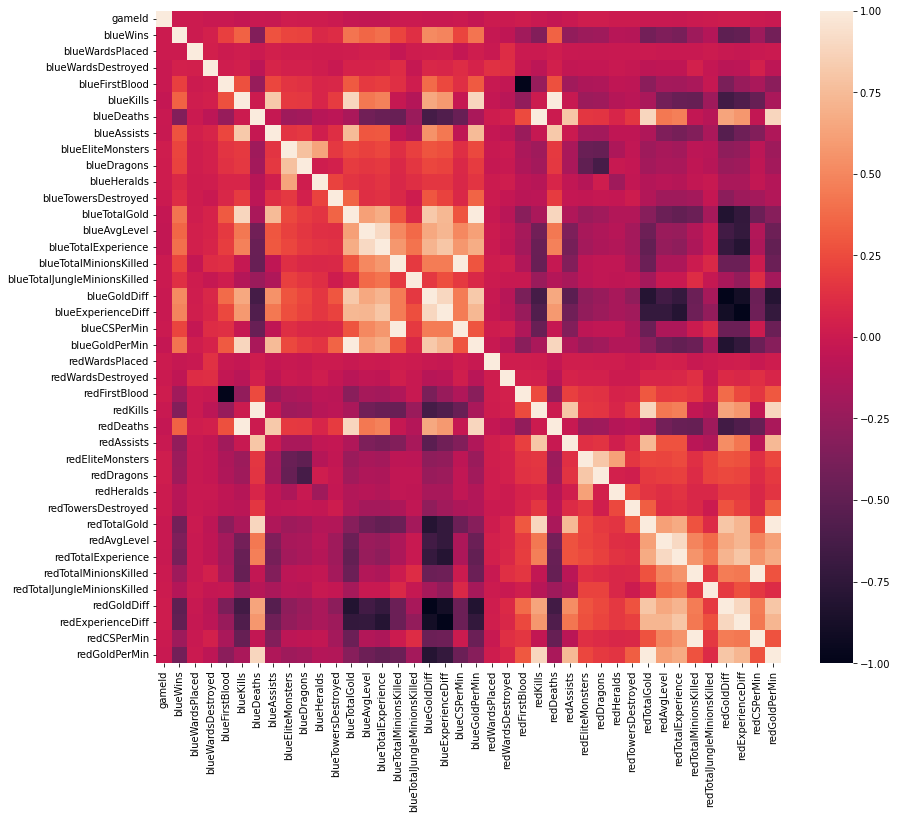

In [22]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_big.corr())

<AxesSubplot:>

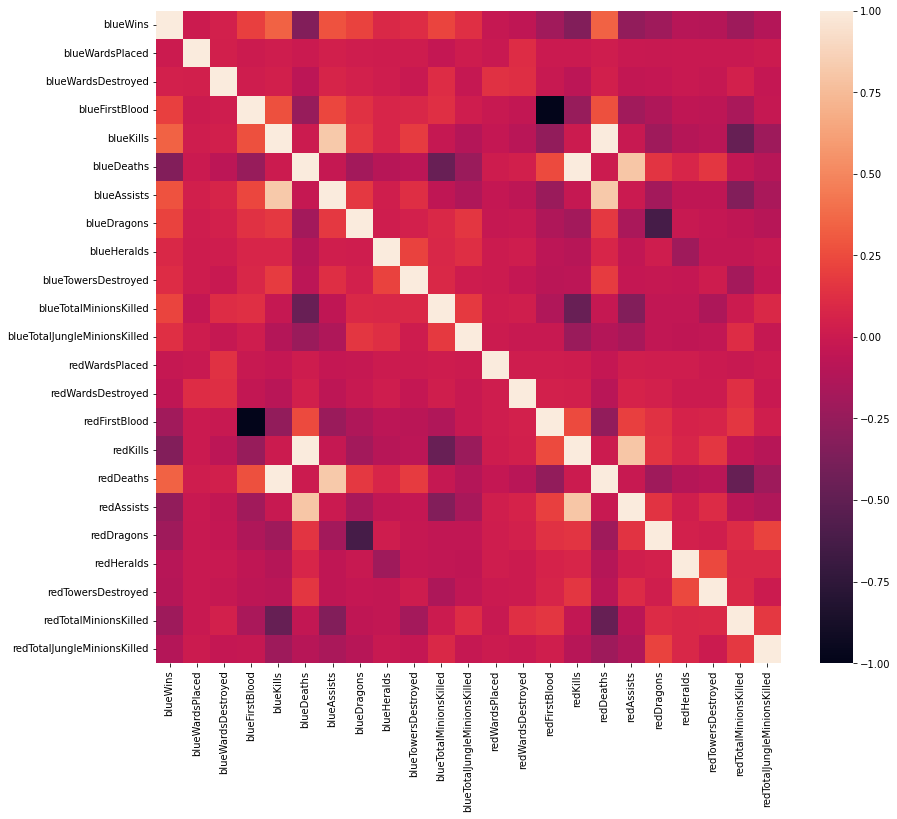

In [23]:
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr())

In [24]:
# удалим признаки с высокой мультиколлинеарностью.
df_select.drop(columns=['redKills', 'redDeaths', 'redFirstBlood'], 
               inplace=True)
df_select.columns

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

<AxesSubplot:>

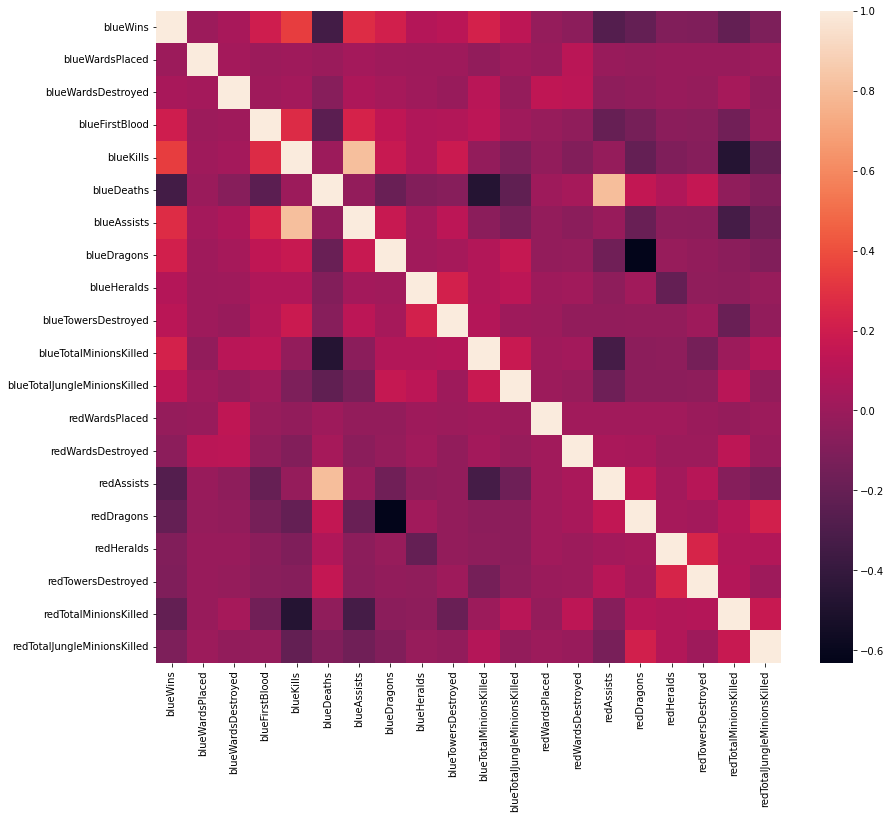

In [25]:
# создадим новую корреляционную матрицу
plt.figure(figsize=(14, 12))
sns.heatmap(df_select.corr())

In [26]:
# функция оценки модели

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, 
                   figsize=(10,5), params=False): 

        
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)
    
    # Classification Report / Scores 

    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    
    print(metrics.classification_report(y_train,y_hat_train, digits=digits))
    

    print("****CLASSIFICATION REPORT - TEST DATA****")
    
    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")

    
    fig, axes = plt.subplots(ncols=2, 
                             figsize=figsize)
    
    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    
    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')
    
    plt.tight_layout()
    plt.show()
    
    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)
        
    
def split_scale(df, target, scaler=StandardScaler()):
   
    
    
    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
    
    # Get list of column names
    cols = X_train.columns
    
    # Scale columns
    scaler = scaler
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=cols)
    
    return X_train, X_test, y_train, y_test


def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, 
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, 
                   figsize=figsize, params=params)
    
    return model

In [27]:
# Create training and test data splits.
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df_select, 'blueWins')
X_train_big, X_test_big, y_train_big, \
             y_test_big = split_scale(df_big, 'blueWins')

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7183    0.7219    0.7201      4203
           1     0.7199    0.7163    0.7181      4194

    accuracy                         0.7191      8397
   macro avg     0.7191    0.7191    0.7191      8397
weighted avg     0.7191    0.7191    0.7191      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7409    0.7359    0.7384       746
           1     0.7341    0.7391    0.7366       736

    accuracy                         0.7375      1482
   macro avg     0.7375    0.7375    0.7375      1482
weighted avg     0.7375    0.7375    0.7375      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


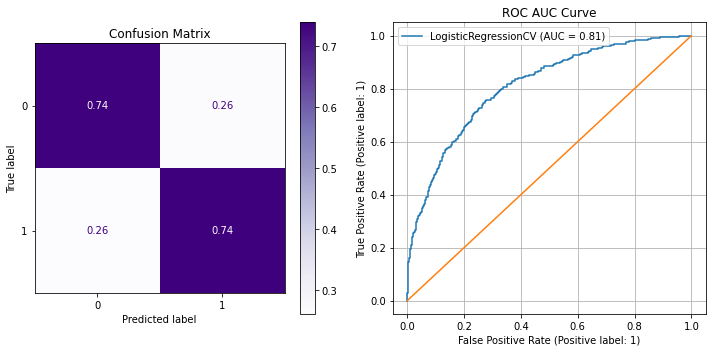

In [28]:
# Fit and evaluate df_select on a Logistic Regression model.
log_select = fit_eval(LogisticRegressionCV(random_state=42), \
                      X_train_select, y_train_select, \
                      X_test_select, y_test_select)

In [29]:
# проведём поиск лучших гиперпараметров
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
640 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000.0,
                               1000000000000.0],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [30]:
# посмотрим лучшие гиперпараметры
log_grid.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'fit_intercept': False,
 'penalty': 'l1',
 'solver': 'liblinear'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7212    0.7214    0.7213      4203
           1     0.7207    0.7206    0.7206      4194

    accuracy                         0.7210      8397
   macro avg     0.7210    0.7210    0.7210      8397
weighted avg     0.7210    0.7210    0.7210      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7391    0.7252    0.7321       746
           1     0.7267    0.7405    0.7335       736

    accuracy                         0.7328      1482
   macro avg     0.7329    0.7328    0.7328      1482
weighted avg     0.7329    0.7328    0.7328      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


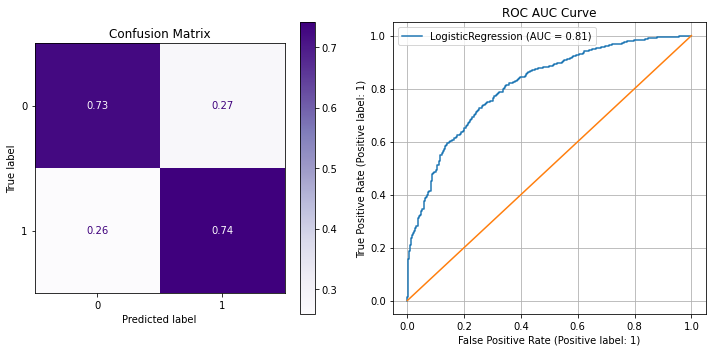

****MODEL PARAMETERS****


,parameters
C,0.01
class_weight,balanced
dual,False
fit_intercept,False
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l1


In [31]:
# оценим модель с лучшими параметрами
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

In [32]:
log_reg_ref = LogisticRegression(random_state=42)

params = {'C': [0.0001, 0.001],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid_refined = GridSearchCV(log_reg_ref, params, scoring='recall_macro')
log_grid_refined.fit(X_train_select, y_train_select)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver n

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.0001, 0.001], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

In [33]:
log_grid_refined.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7173    0.7185    0.7179      4203
           1     0.7175    0.7163    0.7169      4194

    accuracy                         0.7174      8397
   macro avg     0.7174    0.7174    0.7174      8397
weighted avg     0.7174    0.7174    0.7174      8397

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7358    0.7279    0.7318       746
           1     0.7272    0.7351    0.7311       736

    accuracy                         0.7314      1482
   macro avg     0.7315    0.7315    0.7314      1482
weighted avg     0.7315    0.7314    0.7314      1482

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


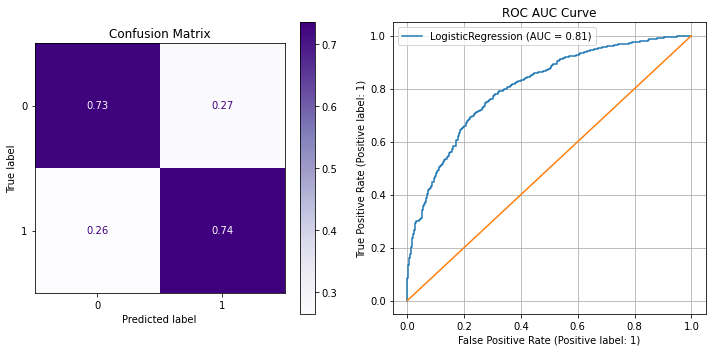

****MODEL PARAMETERS****


,parameters
C,0.001
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [34]:
evaluate_model(log_grid_refined.best_estimator_, X_train_select, \
               y_train_select, X_test_select, y_test_select, params=True)

# Задание
Четвёртое исследование на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый 
- использовать на выбор любой метод линейной регрессии 
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний